In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress
from sklearn import datasets

# %matplotlib inline
# %matplotlib notebook

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [3]:
#Read CSV file from Curtis for plots

data_file = ('./Output_data/Exported_combined_data_monthly.csv')
energy_file = pd.read_csv(data_file)
energy_file

,Unnamed: 0,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI Jan,Ave GHI Jan,Ave Lat Tilt Jan,Ave DNI Aug,Ave GHI Aug,Ave Lat Tilt Aug
0,0,Puerto Peñasco,31.32,-113.53,31.11,78.0,27.0,7.15,MX,1.596307e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cockburn Town,21.46,-71.14,29.00,74.0,75.0,8.70,TC,1.596307e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,2,San Felipe,10.34,-68.74,31.10,52.0,70.0,4.54,VE,1.596307e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Princeton,25.54,-80.41,32.00,66.0,20.0,10.80,US,1.596307e+09,5.18,3.81,5.22,4.26,5.51,5.40
4,4,Deloraine,-41.53,146.67,10.00,100.0,40.0,4.60,AU,1.596307e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Jesup,31.61,-81.89,35.00,39.0,40.0,1.31,US,1.596308e+09,4.21,2.94,4.42,4.35,5.60,5.57
996,996,Potam,27.60,-110.38,34.00,46.0,75.0,4.10,MX,1.596308e+09,NaN,NaN,NaN,NaN,NaN,NaN
997,997,Woodburn,45.14,-122.86,22.78,64.0,20.0,0.88,US,1.596308e+09,1.51,1.18,2.04,6.19,5.90,6.27
998,998,Somerton,32.60,-114.71,40.00,29.0,1.0,8.20,US,1.596308e+09,6.43,3.65,5.94,7.85,6.94,6.93


In [4]:
gmaps.configure(api_key=gkey)

In [5]:
energy_file = energy_file.dropna()
energy_file

,Unnamed: 0,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI Jan,Ave GHI Jan,Ave Lat Tilt Jan,Ave DNI Aug,Ave GHI Aug,Ave Lat Tilt Aug
3,3,Princeton,25.54,-80.41,32.00,66.0,20.0,10.80,US,1.596307e+09,5.18,3.81,5.22,4.26,5.51,5.40
7,7,Lompoc,34.64,-120.46,20.00,77.0,0.0,5.70,US,1.596307e+09,4.83,2.99,4.90,6.52,6.70,6.81
8,8,Ridgecrest,35.62,-117.67,36.11,11.0,1.0,1.50,US,1.596307e+09,6.70,3.30,5.88,9.46,7.45,7.51
10,10,Tuckahoe,37.59,-77.56,32.22,62.0,75.0,1.50,US,1.596307e+09,3.93,2.37,4.08,4.51,5.52,5.58
11,11,Farmington,36.73,-108.22,31.67,20.0,1.0,4.10,US,1.596307e+09,5.98,2.92,5.31,7.76,6.81,6.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,Mashpee,41.65,-70.48,29.44,54.0,40.0,3.60,US,1.596308e+09,2.92,1.84,3.36,4.36,5.22,5.37
995,995,Jesup,31.61,-81.89,35.00,39.0,40.0,1.31,US,1.596308e+09,4.21,2.94,4.42,4.35,5.60,5.57
997,997,Woodburn,45.14,-122.86,22.78,64.0,20.0,0.88,US,1.596308e+09,1.51,1.18,2.04,6.19,5.90,6.27
998,998,Somerton,32.60,-114.71,40.00,29.0,1.0,8.20,US,1.596308e+09,6.43,3.65,5.94,7.85,6.94,6.93


In [6]:
#Storing lat/lng into locations
locations = energy_file[["Lat", "Lng"]].astype(float)

#Convert humidity to float and store
cloudy_locale = energy_file["Cloudiness"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=cloudy_locale, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Ave DNI = Annual average Direct Normal Irradiance
#Ave GHI = Annual average Global Horizontal Irradiance
#Ave Lat Tilt = Annual average Tilt at Latitude

#Website documentation
#https://developer.nrel.gov/docs/solar/solar-resource-v1/

#Linear Regression

In [7]:
energy_file

,Unnamed: 0,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI Jan,Ave GHI Jan,Ave Lat Tilt Jan,Ave DNI Aug,Ave GHI Aug,Ave Lat Tilt Aug
3,3,Princeton,25.54,-80.41,32.00,66.0,20.0,10.80,US,1.596307e+09,5.18,3.81,5.22,4.26,5.51,5.40
7,7,Lompoc,34.64,-120.46,20.00,77.0,0.0,5.70,US,1.596307e+09,4.83,2.99,4.90,6.52,6.70,6.81
8,8,Ridgecrest,35.62,-117.67,36.11,11.0,1.0,1.50,US,1.596307e+09,6.70,3.30,5.88,9.46,7.45,7.51
10,10,Tuckahoe,37.59,-77.56,32.22,62.0,75.0,1.50,US,1.596307e+09,3.93,2.37,4.08,4.51,5.52,5.58
11,11,Farmington,36.73,-108.22,31.67,20.0,1.0,4.10,US,1.596307e+09,5.98,2.92,5.31,7.76,6.81,6.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,Mashpee,41.65,-70.48,29.44,54.0,40.0,3.60,US,1.596308e+09,2.92,1.84,3.36,4.36,5.22,5.37
995,995,Jesup,31.61,-81.89,35.00,39.0,40.0,1.31,US,1.596308e+09,4.21,2.94,4.42,4.35,5.60,5.57
997,997,Woodburn,45.14,-122.86,22.78,64.0,20.0,0.88,US,1.596308e+09,1.51,1.18,2.04,6.19,5.90,6.27
998,998,Somerton,32.60,-114.71,40.00,29.0,1.0,8.20,US,1.596308e+09,6.43,3.65,5.94,7.85,6.94,6.93


 the rsquared value is 0.31264711650051236


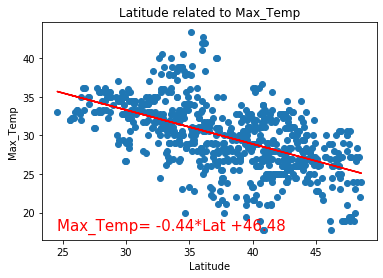

 the rsquared value is 0.0022188088327583064


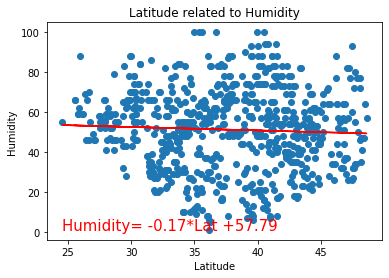

 the rsquared value is 0.00939378594245174


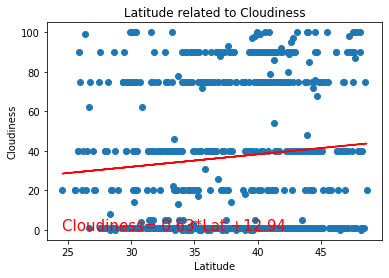

 the rsquared value is 0.021479316288814606


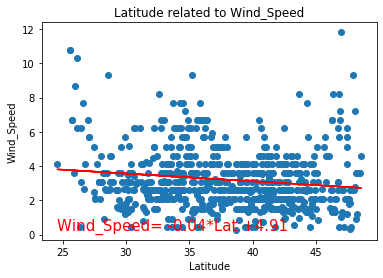

 the rsquared value is 0.018297722051247703


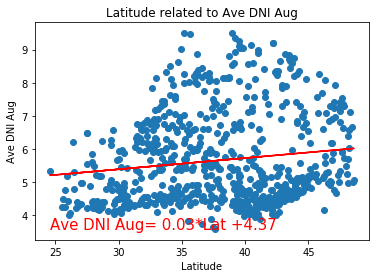

 the rsquared value is 0.0517883771344113


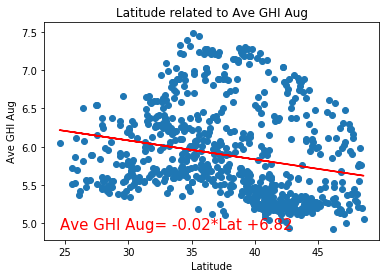

 the rsquared value is 0.0001126938286624318


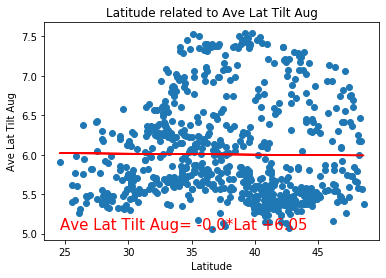

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots
# AUGUST

plot_data = energy_file[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI Aug', 'Ave GHI Aug', 'Ave Lat Tilt Aug']]
yvalues = ['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI Aug', 'Ave GHI Aug', 'Ave Lat Tilt Aug']
xvalue = energy_file['Lat']

for each_variable in yvalues:
    
    yvalue = energy_file[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
#     plt.ylim((0,10))
    plt.title(f'Latitude related to {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

 the rsquared value is 0.31264711650051236


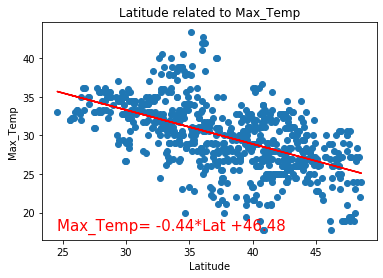

 the rsquared value is 0.0022188088327583064


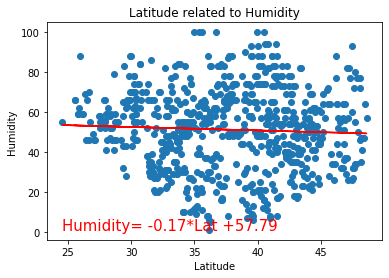

 the rsquared value is 0.00939378594245174


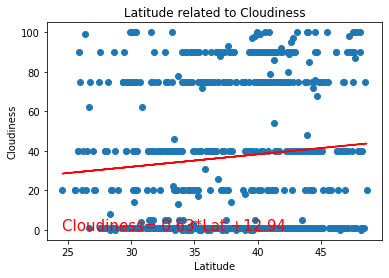

 the rsquared value is 0.021479316288814606


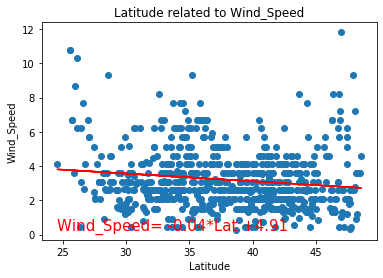

 the rsquared value is 0.4798089644160102


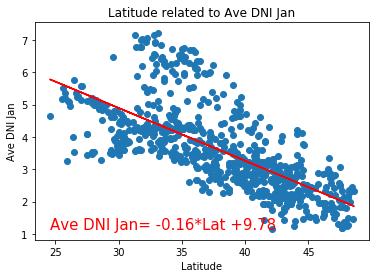

 the rsquared value is 0.8491548048093236


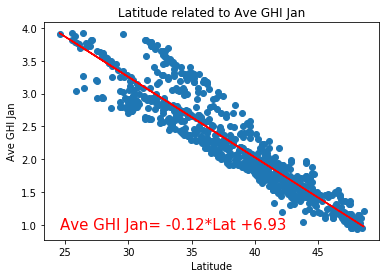

 the rsquared value is 0.5928876299276167


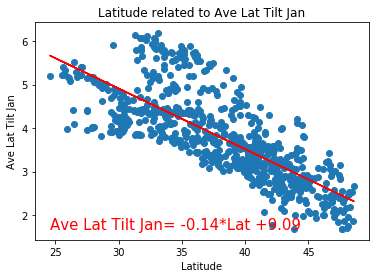

In [27]:
# JANUARY

plot_data = energy_file[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI Jan', 'Ave GHI Jan', 'Ave Lat Tilt Jan']]
yvalues = ['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Ave DNI Jan', 'Ave GHI Jan', 'Ave Lat Tilt Jan']
xvalue = energy_file['Lat']

for each_variable in yvalues:
    
    yvalue = energy_file[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Latitude related to {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

 the rsquared value is 0.4798089644160102


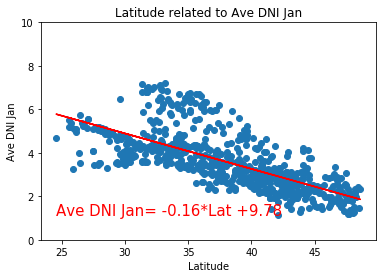

 the rsquared value is 0.8491548048093236


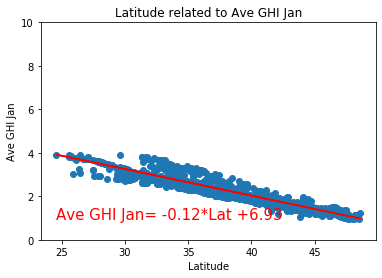

 the rsquared value is 0.5928876299276167


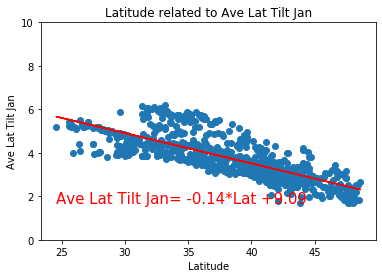

In [9]:
# JANUARY DATA

plot_data = energy_file[['Ave DNI Jan', 'Ave GHI Jan', 'Ave Lat Tilt Jan']]
yvalues = ['Ave DNI Jan', 'Ave GHI Jan', 'Ave Lat Tilt Jan']
xvalue = energy_file['Lat']

for each_variable in yvalues:
    
    yvalue = energy_file[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.ylim(0,10)
    plt.title(f'Latitude related to {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

 the rsquared value is 0.018297722051247703


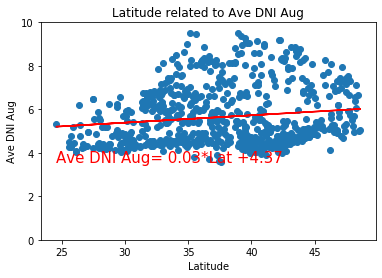

 the rsquared value is 0.0517883771344113


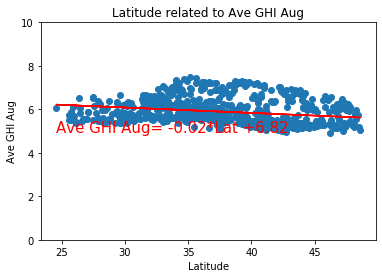

 the rsquared value is 0.0001126938286624318


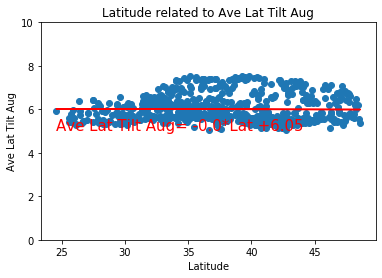

In [10]:
# AUGUST DATA

plot_data = energy_file[['Ave DNI Aug', 'Ave GHI Aug', 'Ave Lat Tilt Aug']]
yvalues = ['Ave DNI Aug', 'Ave GHI Aug', 'Ave Lat Tilt Aug']
xvalue = energy_file['Lat']

for each_variable in yvalues:
    
    yvalue = energy_file[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.ylim(0,10)
    plt.title(f'Latitude related to {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()